<a href="https://colab.research.google.com/github/pratik1808/Badminton-ThomasCup-2022/blob/main/Thomas_Cup_2022_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

input_data=pd.read_csv("thomascup_2022_tweets.csv")

In [2]:
input_data.describe()

,id,user followers count,replycount,retweetcount,likecount,quotecount,quotedtweet,inReplyToTweetId
count,9.704000e+03,9.704000e+03,9704.000000,9704.000000,9704.000000,9704.000000,0.0,1.174000e+03
mean,1.525416e+18,2.976977e+04,2.629534,4.743714,41.826154,1.114695,NaN,1.525281e+18
std,1.543448e+15,3.719312e+05,31.663891,65.120010,565.075728,19.098370,NaN,3.082754e+15
min,1.477541e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,1.473159e+18
25%,1.525150e+18,4.200000e+01,0.000000,0.000000,0.000000,0.000000,NaN,1.525163e+18
50%,1.525775e+18,2.010000e+02,0.000000,0.000000,0.000000,0.000000,NaN,1.525770e+18
75%,1.525784e+18,7.280000e+02,0.000000,0.000000,2.000000,0.000000,NaN,1.525783e+18
max,1.538481e+18,1.442951e+07,1499.000000,2724.000000,31080.000000,841.000000,NaN,1.538479e+18


In [3]:
input_data.head()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,NaN,NaN,"India has won the Thomas cup, @nikhat_zareen ..."
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,NaN,NaN,PM’s interaction with Thomas Cup Champions is ...
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,NaN,NaN,India won maiden Thomas Cup after defeating 14...
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...


In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9704 non-null   int64  
 1   text                  9704 non-null   object 
 2   username              9704 non-null   object 
 3   hashtags              9680 non-null   object 
 4   created_at            9704 non-null   object 
 5   user followers count  9704 non-null   int64  
 6   replycount            9704 non-null   int64  
 7   retweetcount          9704 non-null   int64  
 8   likecount             9704 non-null   int64  
 9   quotecount            9704 non-null   int64  
 10  language              9704 non-null   object 
 11  quotedtweet           0 non-null      float64
 12  inReplyToTweetId      1174 non-null   float64
 13  inReplyToUser         1174 non-null   object 
 14  mentionedUsers        9704 non-null   object 
dtypes: float64(2), int64(

In [5]:
input_data['replycount'].value_counts()

0      8125
1      1063
2       170
3        58
4        35
       ... 
109       1
101       1
84        1
89        1
59        1
Name: replycount, Length: 133, dtype: int64

In [6]:
k=input_data[input_data['inReplyToUser'].isna()]


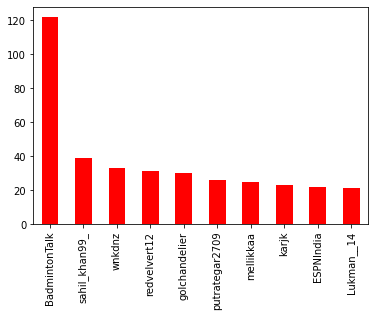

In [7]:
k['username'].value_counts()[:10].plot(kind='bar',color='red')

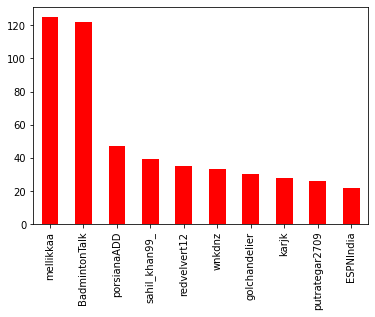

In [8]:
input_data['username'].value_counts()[:10].plot(kind='bar',color='red')

BadmintonTalk has overall a high tweet count, in replies as well as individual tweets


In [9]:
k.shape

(8530, 15)

In [10]:
input_data.shape

(9704, 15)

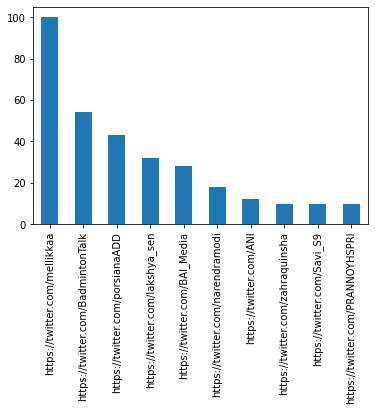

In [11]:
input_data['inReplyToUser'].value_counts()[:10].plot(kind='bar')

Melikkaa has also recieved a lot of replies on her tweets, even though she has not made many individual tweets. This gives us an indication that if you reply to other tweets, people are more likely to reply on your tweets, even if you dont tweet that much often.

**Topic Modelling**

To get a sense of what the people are talking about in context of Thomas 2022 cup, we run a topic modeling on the tweets using BERTTopic.

In [13]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
from bertopic import BERTopic

In [15]:
commentslist=input_data['text'].tolist()

In [16]:
strcomments = [str(x) for x in commentslist]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")#To remove stop words
model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(strcomments)

Batches:   0%|          | 0/304 [00:00<?, ?it/s]

2023-01-31 03:39:07,773 - BERTopic - Transformed documents to Embeddings
2023-01-31 03:39:52,059 - BERTopic - Reduced dimensionality
2023-01-31 03:39:59,073 - BERTopic - Clustered reduced embeddings


In [20]:
freq = model.get_topic_info()
freq.head(30)

,Topic,Count,Name
0,-1,4200,-1_thomascup_india_thomas_cup
1,0,365,0_badminton team_badminton_indian badminton_co...
2,1,276,1_thomascup thomascup_thomascup 14_14_30 thoma...
3,2,232,2_badmintonindonesia_badmintontalk_bulutangkis...
4,3,136,3_champions indonesia_indonesia win_14time_ind...
5,4,134,4_thomascup thomascup_net net_net_thomascup
6,5,125,5_congratulations teamindia_teamindia_teamindi...
7,6,115,6_srikanth_kidambi_kidambi srikanth_srikidambi
8,7,100,7_ginting_ginting thomascup_thomascup ginting_...
9,8,90,8_ini_tim_yang_di


In [22]:
a_topic = freq.iloc[9]['Topic'] 
model.get_topic(a_topic)

[('ini', 0.01690897541850028),
 ('tim', 0.01563859422986113),
 ('yang', 0.013877889983944498),
 ('di', 0.013290803537948445),
 ('indonesia', 0.012210629570724024),
 ('sudah', 0.0117571647099712),
 ('dan', 0.01127892751926606),
 ('mereka', 0.011232894592956085),
 ('sama', 0.010826265585043186),
 ('thomascup indonesia', 0.010350255469756996)]

In [23]:
model.visualize_topics()

In [26]:

model.visualize_barchart(top_n_topics=12)

In [25]:
model.visualize_hierarchy(top_n_topics=30)

As we can see above, in the bar chart, we have visualized some (12) topics and their key words. The first prominent topic existing among tweets is about congratulating India, which is as expected and a lot of smaller topics, seen in the intertopic map are revolving around the same topic. The second prominent topic is about Thomas cup 2022, not specifically about India. The next few topics are informatory which convey the overall result of the tournament, revolving around India Beating Indonesia. These are the few topics of highest importance from our analysis we can say are most discussed among tweets. The following tweets then talk about individual players from both sides in the final and about players from other teams like Malaysia etc. 

Overall we can say the majority topics are having a positive sentiment and are about the competition and players.

Moving ahead, we will determine the sentiment of these tweets and run a similar analysis on the negative sentiment tweets


In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [33]:
!pip install vaderSentiment

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()
input_data['scores'] = input_data['text'].apply(lambda review: sa.polarity_scores(review))
input_data['compound_score']  = input_data['scores'].apply(lambda score_dict: score_dict['compound'])
input_data=input_data.sort_values(by='compound_score', ascending=True)
input_data[:5]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers,scores,compound_score
8514,1524759040538066951,"You can bash me for this, but DinFei can't pla...",redvelvert12,"['ThomasCup2022', 'TUC2022', 'ThomasCup', 'Tho...",2022-05-12 14:30:58+00:00,18,2,1,5,0,en,NaN,NaN,NaN,"You can bash me for this, but DinFei can't pla...","{'neg': 0.344, 'neu': 0.581, 'pos': 0.075, 'co...",-0.9462
42,1526031650752057348,"@JustinTrudeau Sir,\n\nThis is called terroris...",palakkumar5763,"['ThomasCup', 'India']",2022-05-16 02:47:52+00:00,99,0,0,0,0,en,NaN,NaN,NaN,"@JustinTrudeau Sir,\n\nThis is called terroris...","{'neg': 0.305, 'neu': 0.625, 'pos': 0.07, 'com...",-0.9246
9000,1524466511389335553,People attacking Wooi Yik &amp; wanna Aaron &a...,redvelvert12,"['TUC2022', 'ThomasAndUberCups2022', 'ThomasCup']",2022-05-11 19:08:34+00:00,18,1,0,1,0,en,NaN,NaN,NaN,People attacking Wooi Yik &amp; wanna Aaron &a...,"{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compou...",-0.9237
1606,1525830140504047616,The #ThomasCup final was a fascist spectacle. ...,trvivek,['ThomasCup'],2022-05-15 13:27:08+00:00,2334,3,2,7,0,en,NaN,NaN,NaN,The #ThomasCup final was a fascist spectacle. ...,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'comp...",-0.9184
8026,1524980293752324096,Indonesians say that Malaysians always steal t...,briantanlive,['thomascup'],2022-05-13 05:10:09+00:00,474,0,0,2,0,en,NaN,NaN,NaN,Indonesians say that Malaysians always steal t...,"{'neg': 0.373, 'neu': 0.627, 'pos': 0.0, 'comp...",-0.8931


In [34]:
negative_tweets=input_data[input_data['compound_score']<0]

In [44]:
negative_tweets.shape

(482, 17)

In [45]:
commentslist=negative_tweets['text'].tolist()
strcomments = [str(x) for x in commentslist]
model = BERTopic(
    #vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(strcomments)

freq = model.get_topic_info()
freq.head(10)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2023-01-31 05:27:35,571 - BERTopic - Transformed documents to Embeddings
2023-01-31 05:27:39,737 - BERTopic - Reduced dimensionality
2023-01-31 05:27:39,783 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name
0,0,270,0_thomascup_thomascup2022_tuc2022_the
1,1,212,1_the_thomascup_in_to


In [40]:
freq = model.get_topic_info()

In [47]:
freq.head()

,Topic,Count,Name
0,0,270,0_thomascup_thomascup2022_tuc2022_the
1,1,212,1_the_thomascup_in_to


Bert topic does not give discrete topics here, only two topics. Lets try some other Berttopic modelling configurations to see if we get some granularity on the negative tweets.


In [48]:
import nltk
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from gensim.models.coherencemodel import CoherenceModel
from sklearn.datasets import fetch_20newsgroups


In [49]:
dataset = fetch_20newsgroups(subset='train')['data']

In [54]:
dataset[1]

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [56]:
commentslist[1]

"@JustinTrudeau Sir,\n\nThis is called terrorism by terrorists\nWh R U. U khalistani happy in India... otherwise under Mughal ruler aera you can't even speak.\n @theJagmeetSingh ,\n\n#ThomasCup\n#India\n\n* Second attack on Sikhs in 8 months: * 2 Sikhs shot dead in Peshawar, Pakistan"

In [57]:
full_train = pd.DataFrame() 
full_train['text'] = commentslist
full_train['text'] = full_train['text'].fillna('').astype(str) #removing any nan type objects
full_train.head()
documents = full_train
documents

,text
0,"You can bash me for this, but DinFei can't pla..."
1,"@JustinTrudeau Sir,\n\nThis is called terroris..."
2,People attacking Wooi Yik &amp; wanna Aaron &a...
3,The #ThomasCup final was a fascist spectacle. ...
4,Indonesians say that Malaysians always steal t...
...,...
477,this match make me cry :)\n#ThomasCup
478,"Mitron, please set alarm for tomorrow Sunday 1..."
479,Watched the winning moments of #ThomasCup2022 ...
480,I'm imagining Malaysia laughing at Indonesia's...


In [59]:
#If the following packages are not already downloaded, the following lines are needed 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [60]:
filtered_text = []
lemmatizer = WordNetLemmatizer()

for w in commentslist:
  filtered_text.append(lemmatizer.lemmatize(w))
print(filtered_text[:1])

["You can bash me for this, but DinFei can't play like that. Besides errors, their defence??? Facepalm. They can't win with opponents who do well in their smashes. They also can't win depend on their smashes alone. \n#ThomasCup2022 \n#TUC2022\n#ThomasCup \n#ThomasUberCup2022"]


In [70]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [91]:
# Step 2.2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=2, n_components=2, min_dist=0.1, metric='cosine')

In [92]:
hdbscan_model = HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [82]:
vectorizer_model = CountVectorizer(stop_words="english")

In [83]:
ctfidf_model = ClassTfidfTransformer()

In [93]:
topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  diversity=0.5,
  nr_topics=10                        # Step 6 - Diversify topic words
)

In [94]:
topics, probabilities = topic_model.fit_transform(filtered_text)

2023-01-31 06:30:33,276 - BERTopic - Transformed documents to Embeddings
2023-01-31 06:30:37,108 - BERTopic - Reduced dimensionality
2023-01-31 06:30:37,177 - BERTopic - Clustered reduced embeddings
2023-01-31 06:31:03,480 - BERTopic - Reduced number of topics from 93 to 11


In [95]:
freq = topic_model.get_topic_info()

In [98]:
freq

,Topic,Count,Name
0,-1,29,-1_health_thomascup_hoki_lanjakodakatv9
1,0,111,0_thomascup_srikanth_match_kidambi
2,1,64,1_menang_thomascup_tuc2022_lawan
3,2,48,2_badminton_ipl_lakshya_sen_final
4,3,45,3_cricket_channels_shame_hai
5,4,41,4_lagi_thomascup_indonesia_yg
6,5,39,5_badminton_denmark_finals_indian
7,6,28,6_sen_anthony_india_thomascup
8,7,27,7_umpire_pengen_kevin_thomasubercup2022
9,8,25,8_error_jia_ginting_thomasubercup2022


In [97]:
topic_model.visualize_topics()

In [99]:
topic_model.visualize_barchart(top_n_topics=12)

As we can see, with hyperparameter adjustment for BertTopic, we are able to extract topics from the tweets having negative sentiment. Most prominent topics include talking about player specific discussion and matches between them. This could be a result of having favouritism/bias towards a specific player, making them tweet negatively about another player. The following topics talk about IPL, the Indian Premier League, and Cricket, which is a very popular sport and league in India. Some users express their disappointment, when India wins in sports other than Cricket, the channels broadcasting sports do not care much about highlighting these achievements, just because it is not related to Cricket and hence the negative sentiment in their tweets.

Another interesting negative topic is about the Umpire containing adjectives like annoying, expressing unhappy viewers with umpires calls.

Some negative tweets are prominently from users who expected to see their countries in the finals like Denmark. 

Thus with this analysis, we are able to explore various topics and user intents discussed during the ThomasCup 2022 Finals, with most discussed topic being about congratulating India on the win and some of the negative topics convering disappointment with the umpire and player biases etc.
